In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs) 

Text(0,0.5,'Magnitud')

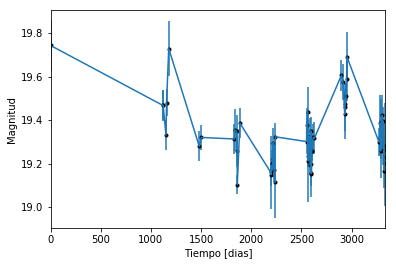

In [2]:
data = np.genfromtxt('LC_19608_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

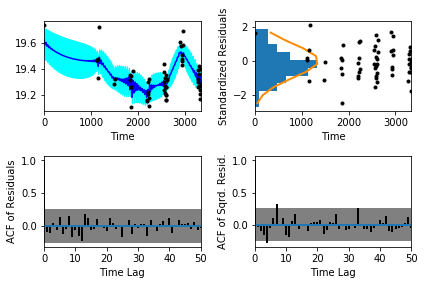

In [5]:
sample.assess_fit()

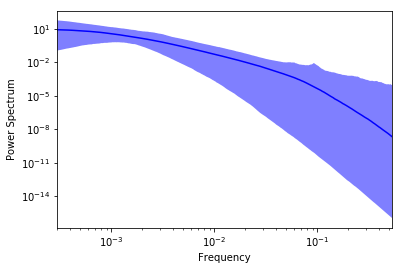

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000374595,0.664386,'Medida del nivel de ruido')

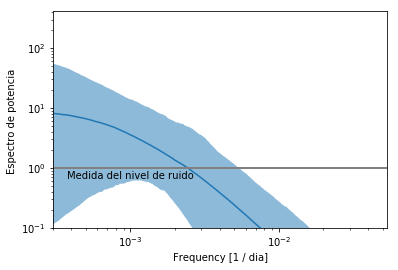

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

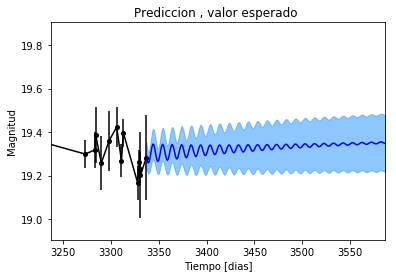

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion, Caminos simulados')

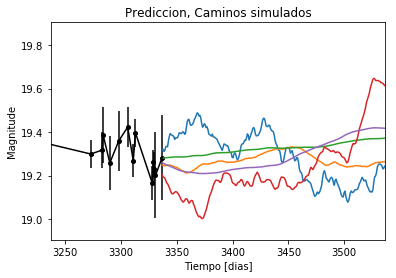

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


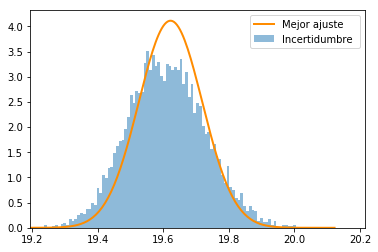

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

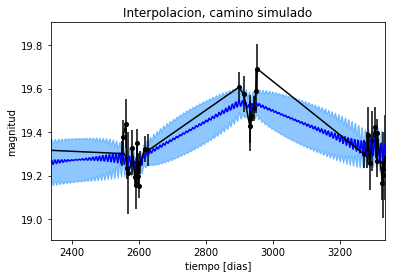

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

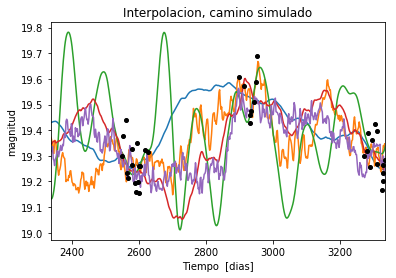

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 673.227058626
Median: 0.0156564904407
Standard deviation: 0.208188746416
68% credibility interval: [ 0.00109765  0.21909215]
95% credibility interval: [  3.68224971e-04   8.04583344e-01]
99% credibility interval: [  3.14242942e-04   9.97881777e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 393.119120282
Median: 0.00446250329235
Standard deviation: 0.101784289355
68% credibility interval: [ 0.00062491  0.05035743]
95% credibility interval: [ 0.00033521  0.33249628]
99% credibility interval: [  3.07203884e-04   7.20537592e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 814.440610387
Median: 0.0785059734637
Standard d

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 673.227058626
Median: 0.0156564904407
Standard deviation: 0.208188746416
68% credibility interval: [ 0.00109765  0.21909215]
95% credibility interval: [  3.68224971e-04   8.04583344e-01]
99% credibility interval: [  3.14242942e-04   9.97881777e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 393.119120282
Median: 0.00446250329235
Standard deviation: 0.101784289355
68% credibility interval: [ 0.00062491  0.05035743]
95% credibility interval: [ 0.00033521  0.33249628]
99% credibility interval: [  3.07203884e-04   7.20537592e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 814.440610387
Median: 0.0785059734637
Standard d

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 482.362484136
Median: 74.5307890465
Standard deviation: 1.70783438213
68% credibility interval: [ 72.67133906  75.92138159]
95% credibility interval: [ 70.35014284  76.82704301]
99% credibility interval: [ 68.38264714  77.68507425]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 327.844710126
Median: 1.3387326571
Standard deviation: 2.60431636993
68% credibility interval: [ 0.17216143  4.96131931]
95% credibility interval: [ 0.02811166  8.93864809]
99% credibility interval: [  0.01480274  12.35104337]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 427.648524633
Median: 1.45067646198
Standard deviation: 11.8103719096
68% credibility interval: [  0.06782157  13.88606055]
95% credibility interval: [  4.31951505e-

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 34323.7601659
Median: 7.52887103691e-33
Standard deviation: 4.75452333569e+88
68% credibility interval: [  5.39885783e-78   1.17565728e+01]
95% credibility interval: [  6.72867110e-120   4.74101073e+070]
99% credibility interval: [  2.83495228e-172   2.21768885e+083]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2425.55730941
Median: 19.3835451891
Standard deviation: 0.0836883846871
68% credibility interval: [ 19.32177985  19.46084389]
95% credibility interval: [ 19.23815453  19.57750971]
99% credibility interval: [ 19.16139395  19.69988325]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 760.983359441
Median: 0.0552618912355
Standard deviation: 0.270879377821
68% credibility interval: [ 0.          0.46914358]
95% credibility interval: [ 0.          0.93013133]
99% credibility interval: [ 0.          1.02871502]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 760.983359441
Median: 0.0552618912355
Standard deviation: 0.270879377821
68% credibility interval: [ 0.          0.46914358]
95% credibility interval: [ 0.          0.93013133]
99% credibility interval: [ 0.          1.02871502]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 2150.69723662
Median: 0.0
Standard deviation: 0.000706476480904
68% cr

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 482.362484136
Median: 74.5307890465
Standard deviation: 1.70783438213
68% credibility interval: [ 72.67133906  75.92138159]
95% credibility interval: [ 70.35014284  76.82704301]
99% credibility interval: [ 68.38264714  77.68507425]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1231.85154302
Median: 0.0274363688302
Standard deviation: 0.0292237642459
68% credibility interval: [ 0.0148113   0.05332257]
95% credibility interval: [ 0.00891274  0.10578671]
99% credibility interval: [ 0.006503    0.16717037]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1463.2244696
Median: 1.02603511809
Standard deviation: 0.185849119098
68% credibility interval: [ 0.85266765  1.21947873]
95% credibility interval: [ 0.71983537  1.45481105]
99% credibility interval: [ 0.65932772  1.59161741]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 331.264605835
Median: 0.00153132122179
Standard deviation: 0.37209476929
68% credibility interval: [  2.57118399e-07   7.82568324e-02]
95% credibility interval: [  1.49351834e-72   1.05191571e+00]
99% credibility interval: [  8.07689134e-86   2.40845076e+00]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 673.227058626
Median: (-0.0983726306988-1.70042400011j)
Standard deviation: 2.14659020416
68% credibility interval: [-1.37659658+0.j         -0.00689671-0.01704347j]
95% credibility interval: [ -5.05534625e+00+0.j          -2.31362573e-03-0.00303882j]
99% credibility interval: [ -6.26987612e+00+0.j          -1.97444663e-03-0.07061752j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 393.119120282
Median: (-0.0280387351197+0.865700652111j)
Standard deviation: 1.81817273644
68% credibility interval: [-0.31640503+1.44052197j -0.00392641+0.j        ]
95% credibility interval: [-2.08913575+1.75981774j -0.00210616+0.07748586j]
99% credibility interval: [ -4.52727121e+00+5.08528596j  -1.93021893e-03+0.j        ]
Posterior sum